# LOAD THE IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# LOAD THE DATASETS

In [2]:
#Load the day dataset
energy_consumption_data =pd.read_csv('energy_consumption.csv')

In [3]:
energy_consumption_data.head()

,Datetime,AEP_MW
0,01/01/2005 01:00,12316
1,01/01/2005 02:00,11890
2,01/01/2005 03:00,11579
3,01/01/2005 04:00,11461
4,01/01/2005 05:00,11472


In [4]:
# Check the last five rows
energy_consumption_data.tail()

,Datetime,AEP_MW
119061,02/08/2018 20:00,17673
119062,02/08/2018 21:00,17303
119063,02/08/2018 22:00,17001
119064,02/08/2018 23:00,15964
119065,03/08/2018 00:00,14809


EXPLORATORY DATA ANALYSIS

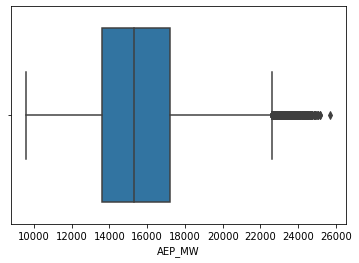

In [5]:
#check for outliers
import seaborn as sns
sns.boxplot(energy_consumption_data['AEP_MW']);

In [6]:
# Find the position of the Outlier and remove them
import numpy as np
y = np.where(energy_consumption_data['AEP_MW']>22000)
y=y[0].tolist()
for index in y:
    energy_consumption_data.drop(index,inplace=True)

In [7]:
energy_consumption_data

,Datetime,AEP_MW
0,01/01/2005 01:00,12316
1,01/01/2005 02:00,11890
2,01/01/2005 03:00,11579
3,01/01/2005 04:00,11461
4,01/01/2005 05:00,11472
...,...,...
119061,02/08/2018 20:00,17673
119062,02/08/2018 21:00,17303
119063,02/08/2018 22:00,17001
119064,02/08/2018 23:00,15964


In [8]:
# Tranform the date column to date range with hour frequency
energy_consumption_data['Datetime'] = pd.date_range(start =energy_consumption_data['Datetime'].iloc[0], periods =117834 ,freq='H')

In [9]:
energy_consumption_data['Datetime'] = pd.to_datetime(energy_consumption_data['Datetime'])

In [10]:
train_dates=pd.to_datetime(energy_consumption_data['Datetime'])
train_dates.tail()

119061   2018-06-11 14:00:00
119062   2018-06-11 15:00:00
119063   2018-06-11 16:00:00
119064   2018-06-11 17:00:00
119065   2018-06-11 18:00:00
Name: Datetime, dtype: datetime64[ns]

In [11]:
#Check the data type information of the variables
energy_consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117834 entries, 0 to 119065
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  117834 non-null  datetime64[ns]
 1   AEP_MW    117834 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.7 MB


In [12]:
# More on dataset information
print ("Number of rows in the dataset  : " ,energy_consumption_data.shape[0])
print ("Number of Columns in the dataset : " ,energy_consumption_data.shape[1])
print ("Features Names : \n" ,energy_consumption_data.columns.tolist())
print ("Missing values :  ", energy_consumption_data.isnull().sum())
print ("Unique values :  \n",energy_consumption_data.nunique())

Number of rows in the dataset  :  117834
Number of Columns in the dataset :  2
Features Names : 
 ['Datetime', 'AEP_MW']
Missing values :   Datetime    0
AEP_MW      0
dtype: int64
Unique values :  
 Datetime    117834
AEP_MW       11747
dtype: int64


In [13]:
# Descriptive statistic summary
energy_consumption_data.describe()

,AEP_MW
count,117834.000000
mean,15429.321486
std,2502.580464
min,9581.000000
25%,13610.000000
50%,15277.000000
75%,17144.000000
max,21999.000000


In [14]:
# Set the index to datetime
energy_consumption_data.set_index('Datetime', inplace =True)

In [15]:
energy_consumption_data.head()

,AEP_MW
Datetime,
2005-01-01 01:00:00,12316
2005-01-01 02:00:00,11890
2005-01-01 03:00:00,11579
2005-01-01 04:00:00,11461
2005-01-01 05:00:00,11472


In [16]:
energy_consumption_data.tail()

,AEP_MW
Datetime,
2018-06-11 14:00:00,17673
2018-06-11 15:00:00,17303
2018-06-11 16:00:00,17001
2018-06-11 17:00:00,15964
2018-06-11 18:00:00,14809


# DATA VISUALIZATION

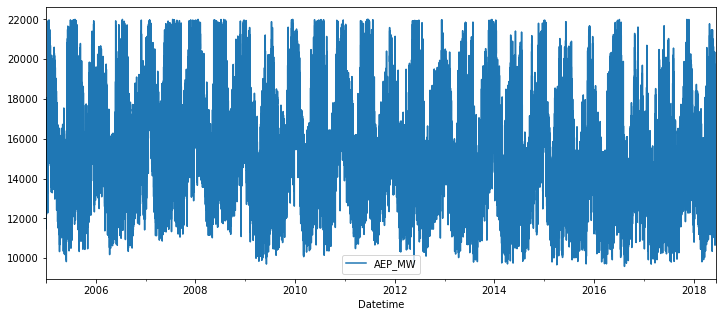

In [17]:
# Visualise the  energy consumption over time
energy_consumption_data.plot(kind='line',figsize =(12,5),legend =True);

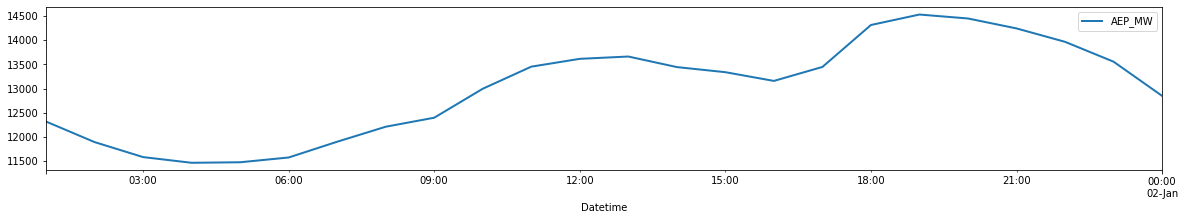

In [18]:
# Visualise a typical day of energy consumption data
a=energy_consumption_data.iloc[0:24]
a.plot(figsize =(20,3),lw=2);

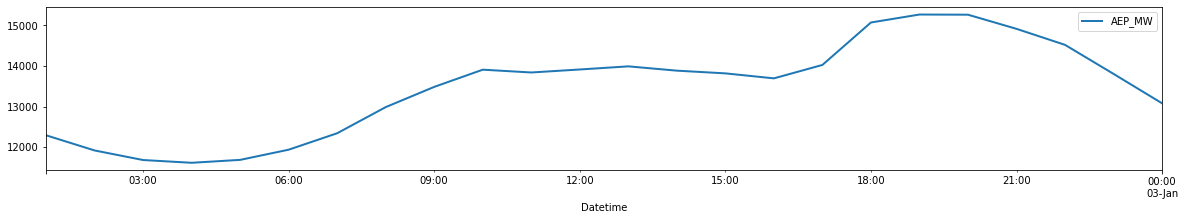

In [19]:
b=energy_consumption_data.iloc[24:48]
b.plot(figsize =(20,3),lw=2);

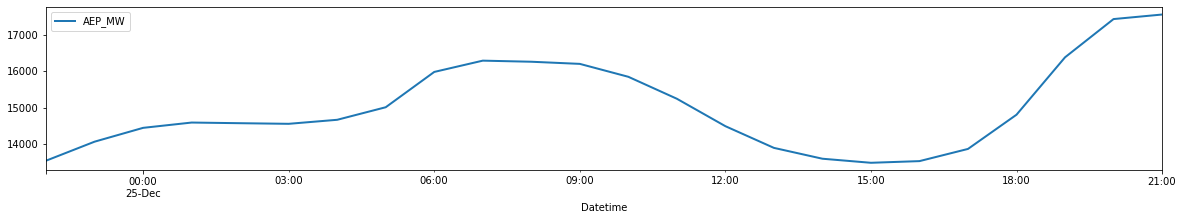

In [20]:
# A typical christmas day energy consumption
# Holiday
c=energy_consumption_data.iloc[17349:17373]
c.plot(figsize =(20,3),lw=2);

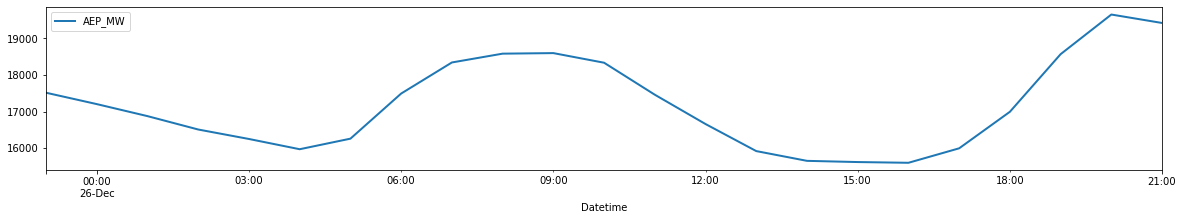

In [21]:
# A typical boxing day energy consumption 
# Holiday
d=energy_consumption_data.iloc[17374:17397]
d.plot(figsize =(20,3),lw=2);

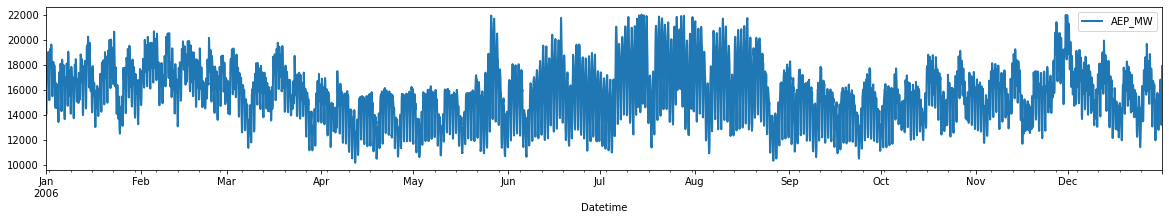

In [22]:
# Energy consumption for year 2006
e=energy_consumption_data.iloc[8759:17516]
e.plot(figsize =(20,3),lw=2);

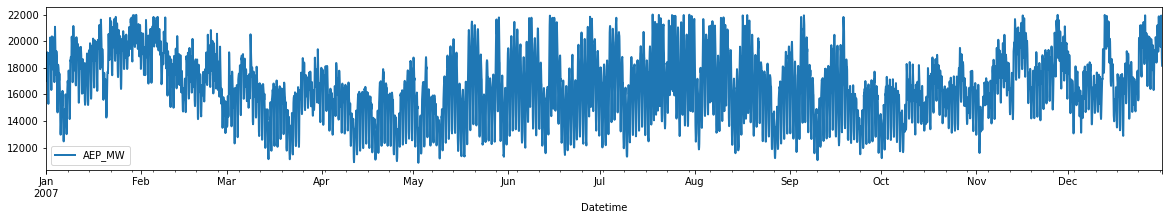

In [23]:
# Energy consumption for year 2007
e=energy_consumption_data.iloc[17517:26274]
e.plot(figsize =(20,3),lw=2);

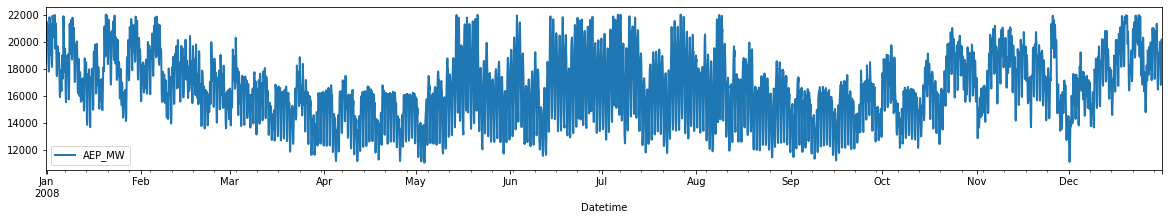

In [24]:
# Energy consumption for year 2008
f=energy_consumption_data.iloc[26275:35056]
f.plot(figsize =(20,3),lw=2);

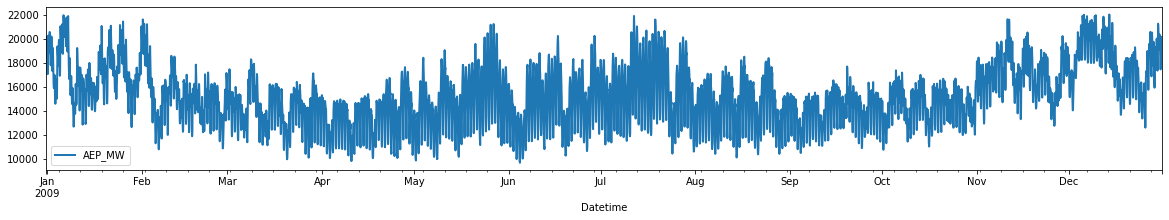

In [25]:
# Energy consumption for year 2009
g=energy_consumption_data.iloc[35057:43814]
g.plot(figsize =(20,3),lw=2);

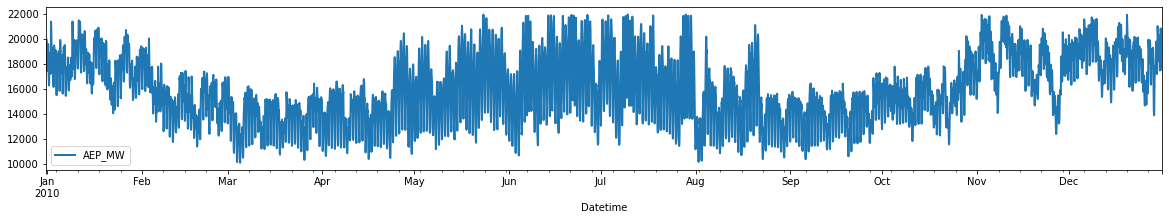

In [26]:
# Energy consumption for year 2010
h=energy_consumption_data.iloc[43815:52571]
h.plot(figsize =(20,3),lw=2);

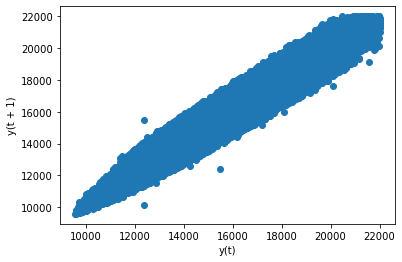

In [27]:
#First check if there is auto correlation
#The plot shows that there is strong autocorrelation
from pandas.plotting import lag_plot

lag_plot(energy_consumption_data);

# Test for Stationarity and Data Decomposition

In [28]:
from statsmodels.tsa.stattools import adfuller
# define a function to determine the stationarity of the time series
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [29]:
# test for stationarity
adf_test(energy_consumption_data)

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.770453e+01
p-value                 3.524655e-30
# lags used             7.100000e+01
# observations          1.177620e+05
critical value (1%)    -3.430406e+00
critical value (5%)    -2.861565e+00
critical value (10%)   -2.566783e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


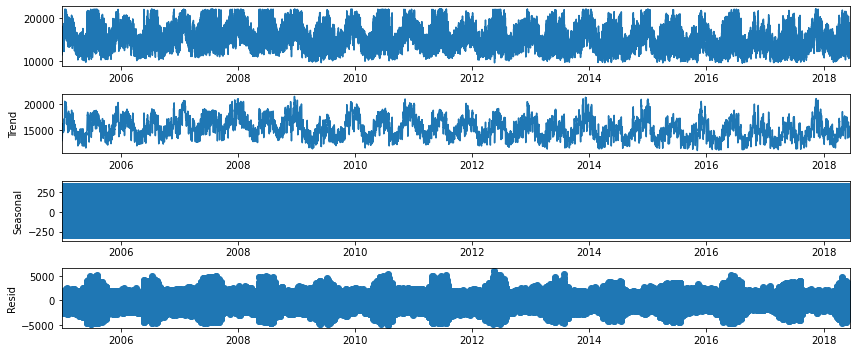

In [30]:
# Decompose the time series into trend, seasonal and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
data_decomp = seasonal_decompose(energy_consumption_data)
data_decomp.plot();

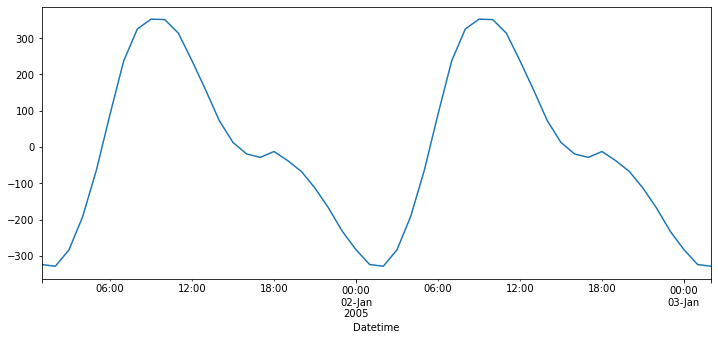

In [31]:
data_decomp.seasonal.iloc[0:50].plot();

# Test for Statistical Significance Using ACF & PACF PLOTS

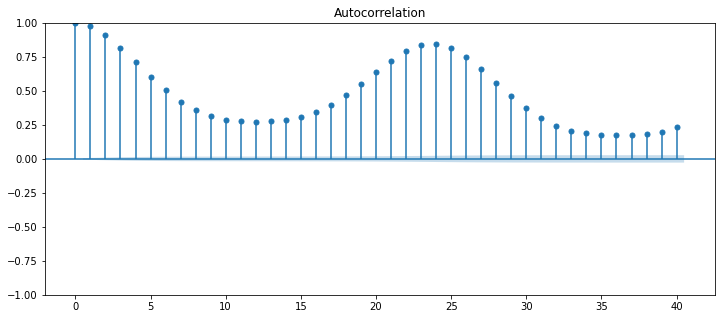

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(energy_consumption_data, lags=40)
plt.show()

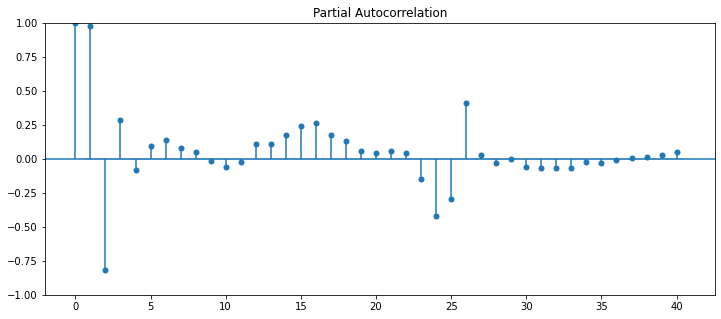

In [33]:
plot_pacf(energy_consumption_data, lags=40)
plt.show()

# Data Normalisation & Data Spliting

In [34]:
# Normalise the data to the same range (0,1)
from sklearn.preprocessing import MinMaxScaler
scale_data=MinMaxScaler() 
energy_consumption_data['AEP_MW_scaled']=scale_data.fit_transform(energy_consumption_data)

In [35]:
scaled_energy_data =energy_consumption_data[['AEP_MW_scaled']]

In [36]:
#scaled_energy_data

In [37]:
data_size =len(scaled_energy_data)
train_set_size =round(data_size*0.80)
train_set_size

94267

In [38]:
# Split dataset into train, validation and test set

In [39]:
train_set = scaled_energy_data.iloc[:94267]
train_size = len(train_set)
#train_size

In [40]:
test_size = len(scaled_energy_data) - train_size
#test_size

In [41]:
train_data=scaled_energy_data.iloc[:95253]
#train_data.head()

In [42]:
test_data=scaled_energy_data.iloc[94267:]
#test_data

# Feature Selection

In [43]:
def create_sequence(dataset,seq_length):
    X = []
    y= []
    
    for i in range(seq_length,len(dataset)): 
        X.append(dataset.iloc[i-seq_length:i, 0])
        y.append(dataset.iloc[i, 0])
        
    return (np.array(X),np.array(y))
seq_length =24 
X_train, y_train = create_sequence(train_data,seq_length)
X_test,y_test = create_sequence(test_data,seq_length)

In [44]:
#y_train.shape

In [45]:
#X_test.shape

In [46]:
#y_test.shape

In [47]:
#X_train.shape

In [48]:
# reshape the training data to 3 dim
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(95229, 24, 1)

# Build and Train the Model

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [50]:
model = Sequential()
model.add(Dense(64,activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1600      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

In [51]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/30
2679/2679 [==============================] - 6s 2ms/step - loss: 0.0156 - mean_absolute_error: 0.0877 - val_loss: 0.0034 - val_mean_absolute_error: 0.0457
Epoch 2/30
2679/2679 [==============================] - 5s 2ms/step - loss: 0.0071 - mean_absolute_error: 0.0605 - val_loss: 0.0044 - val_mean_absolute_error: 0.0528
Epoch 3/30
2679/2679 [==============================] - 5s 2ms/step - loss: 0.0065 - mean_absolute_error: 0.0571 - val_loss: 0.0031 - val_mean_absolute_error: 0.0438
Epoch 4/30
2679/2679 [==============================] - 5s 2ms/step - loss: 0.0062 - mean_absolute_error: 0.0555 - val_loss: 0.0041 - val_mean_absolute_error: 0.0517
Epoch 5/30
2679/2679 [==============================] - 5s 2ms/step - loss: 0.0060 - mean_absolute_error: 0.0542 - val_loss: 0.0042 - val_mean_absolute_error: 0.0516
Epoch 6/30
2679/2679 [==============================] - 5s 2ms/step - loss: 0.0059 - mean_absolute_error: 0.0536 - val_loss: 0.0052 - val_mean_absolute_error: 0.0593
Epoc

# Model Training Plot

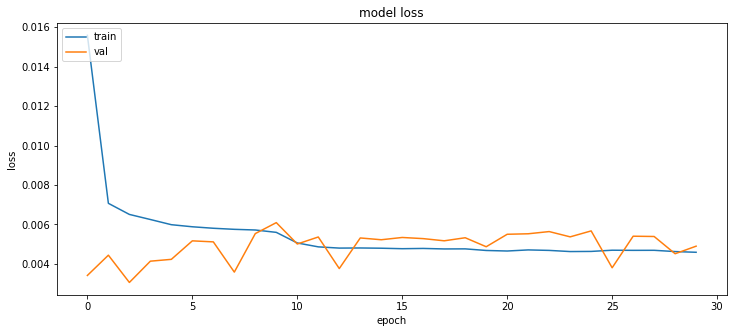

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Test & Evaluate the Model

In [53]:
# Make predictions of the test_data
y_pred =model.predict(X_test)


736/736 [==============================] - 1s 1ms/step


In [54]:
# Evaluate the model performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8734339128963916

In [55]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.004886230743288829

In [56]:
# Convert the predicted values to actual value
predicted_energy_consumption =scale_data.inverse_transform(y_pred)

In [57]:
#Covert the predicted data to a dataframe
predicted_energy_consumption_df = pd.DataFrame(predicted_energy_consumption, columns=['AEP_MW_predicted'], index=test_data.iloc[-23543:].index)
predicted_energy_consumption_df

,AEP_MW_predicted
Datetime,
2015-10-04 20:00:00,15127.059570
2015-10-04 21:00:00,15165.761719
2015-10-04 22:00:00,15404.503906
2015-10-04 23:00:00,16212.291992
2015-10-05 00:00:00,16934.742188
...,...
2018-06-11 14:00:00,17189.099609
2018-06-11 15:00:00,16881.193359
2018-06-11 16:00:00,16369.857422


In [58]:
# Convert the test data to it's actual value
test_data_actual=scale_data.inverse_transform(test_data[-23543:])
test_data_actual

array([[14430.],
       [14690.],
       [15622.],
       ...,
       [17001.],
       [15964.],
       [14809.]])

In [59]:
# Convert the actual test data into a dataframe
test_data_actual_df = pd.DataFrame(test_data_actual, columns=['AEP_Actual'], index=test_data.iloc[-23543:].index)

In [60]:
# Merge the actual test data with the predicted test data
test_data_actual_df['AEP_MW_predicted'] =predicted_energy_consumption_df['AEP_MW_predicted']
test_data_actual_df.tail()

,AEP_Actual,AEP_MW_predicted
Datetime,,
2018-06-11 14:00:00,17673.0,17189.099609
2018-06-11 15:00:00,17303.0,16881.193359
2018-06-11 16:00:00,17001.0,16369.857422
2018-06-11 17:00:00,15964.0,15723.515625
2018-06-11 18:00:00,14809.0,15214.583008


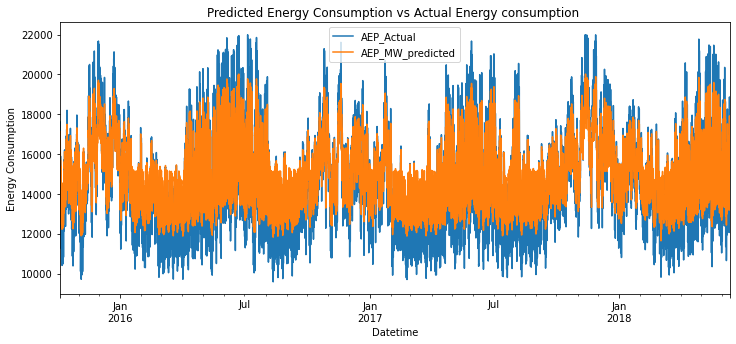

In [61]:
# Make a line plot for visualisation
test_data_actual_df.plot()
plt.ylabel('Energy Consumption')
plt.title('Predicted Energy Consumption vs Actual Energy consumption ');

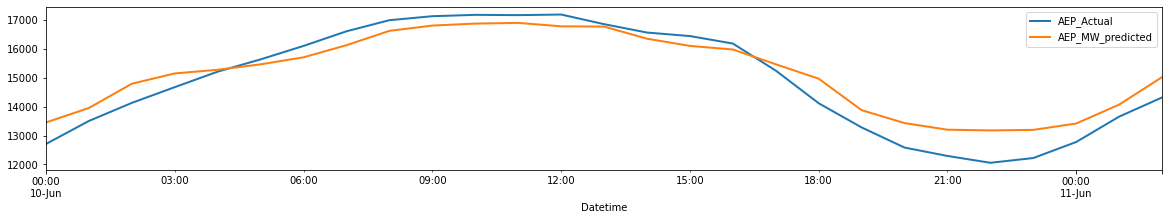

In [62]:
# Visualise a typical day of energy consumption data
a=test_data_actual_df.iloc[-43:-16]
a.plot(figsize =(20,3),lw=2);